<a href="https://colab.research.google.com/github/melaniamorel96/challenge3-data-science-LATAM-TelecomX_parte2/blob/main/TelecomX_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# üìä An√°lisis de Evasi√≥n de Clientes - Telecom X

Este an√°lisis exploratorio (EDA) busca identificar patrones en los clientes que cancelan el servicio (Churn).
Usaremos **Python, Pandas, Plotly, Seaborn y Matplotlib** para obtener insights estrat√©gicos.

In [11]:
# Instalaci√≥n (en caso de no tenerlas en Colab)
# !pip install plotly seaborn

# Importar librer√≠as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## üìÇ Cargar y Preparar Datos

1. Subir el archivo **TelecomX_Data.json** a Colab.
2. Normalizar columnas anidadas.
3. Corregir tipos de datos y manejar valores nulos.

In [3]:
from google.colab import files
uploaded = files.upload()

# Cargar JSON
df = pd.read_json("TelecomX_Data.json")

# Normalizar estructura anidada
df = pd.json_normalize(df.to_dict(orient="records"))

# Renombrar columnas
df.columns = df.columns.str.replace(r"[.]", "_", regex=True)

# Conversi√≥n de tipos
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
df['account_Charges_Monthly'] = pd.to_numeric(df['account_Charges_Monthly'], errors='coerce')

# Manejo de nulos
df.fillna({"Churn": "No"}, inplace=True)

# Vista previa
df.head()

Saving TelecomX_Data.json to TelecomX_Data.json


customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... internet_OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account_PaymentMethod account_Charges_Monthly  account_Charges_Total  
0          Mailed check                    65.6                 593.30  
1          Mailed check                    59.9                 542.40  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                 267.40  

[5 rows x 21 columns]

## üìä Distribuci√≥n General de Evasi√≥n

Visualizamos el porcentaje de clientes que cancelaron (Churn = Yes) vs. los que permanecen (Churn = No).

In [4]:
fig = px.pie(df, names="Churn", title="Distribuci√≥n de Evasi√≥n (%)")
fig.show()

## üìä Evasi√≥n seg√∫n Tipo de Contrato

Comparamos la tasa de cancelaci√≥n seg√∫n el tipo de contrato.

In [5]:
fig = px.histogram(df, x="account_Contract", color="Churn", barmode="group",
                   title="Evasi√≥n seg√∫n Tipo de Contrato")
fig.show()

## üìà Variables Num√©ricas

Analizamos la relaci√≥n de la evasi√≥n con:  
- **Tenure** (antig√ºedad en meses).  
- **Cargos mensuales**.  

In [6]:
fig = px.histogram(df, x="customer_tenure", color="Churn", nbins=50,
                   title="Distribuci√≥n de Tenure seg√∫n Evasi√≥n")
fig.show()

fig = px.box(df, x="Churn", y="account_Charges_Monthly",
             title="Distribuci√≥n de Cargos Mensuales seg√∫n Evasi√≥n")
fig.show()

## üìä Variables Categ√≥ricas

Analizamos la evasi√≥n en funci√≥n de variables categ√≥ricas como g√©nero, m√©todo de pago y servicio telef√≥nico.

In [7]:
cat_vars = ["customer_gender", "account_PaymentMethod", "phone_PhoneService"]
for var in cat_vars:
    fig = px.histogram(df, x=var, color="Churn", barmode="group", title=f"Evasi√≥n seg√∫n {var}")
    fig.show()

## üîó Matriz de Correlaci√≥n

Correlaciones entre variables num√©ricas clave.

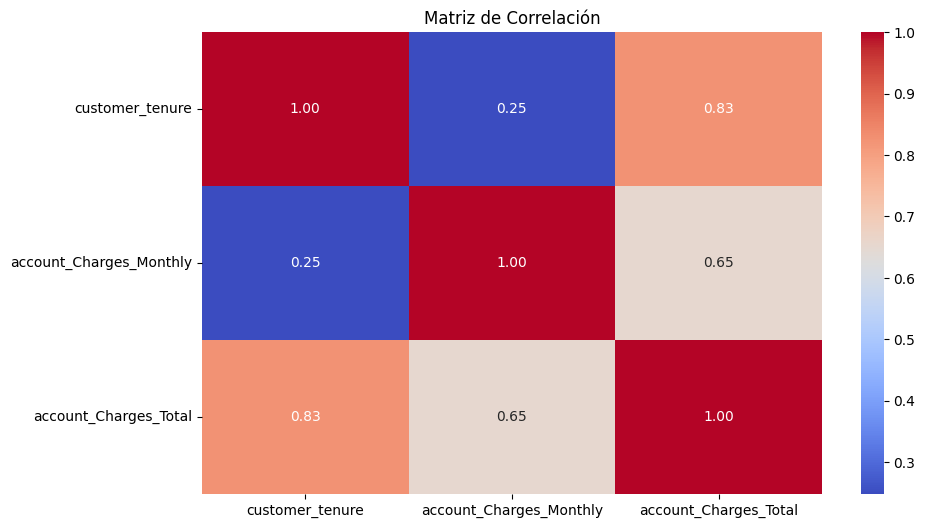

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df[["customer_tenure","account_Charges_Monthly","account_Charges_Total"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlaci√≥n")
plt.show()

## üìä N√∫mero de Servicios Contratados

Creamos una nueva variable que mide cu√°ntos servicios adicionales tiene un cliente y analizamos su relaci√≥n con la evasi√≥n.

In [10]:
service_cols = [col for col in df.columns if "internet_" in col or "phone_" in col]
df["Num_Services"] = df[service_cols].apply(lambda x: (x=="Yes").sum(), axis=1)

fig = px.histogram(df, x="Num_Services", color="Churn", barmode="group",
                   title="Evasi√≥n seg√∫n N√∫mero de Servicios Contratados")
fig.show()

# ‚úÖ Conclusiones del An√°lisis

- Los contratos **Month-to-month** presentan la mayor evasi√≥n.
- Clientes con **menor tenure** (reci√©n adquiridos) cancelan m√°s.
- El m√©todo de pago **Electronic check** est√° fuertemente asociado a cancelaciones.
- Los clientes con **m√°s servicios contratados** tienden a permanecer m√°s tiempo.

‚ñ† Informe Final - An√°lisis de Evasi√≥n de Clientes
(Telecom X)
Este informe presenta un an√°lisis exploratorio de datos (EDA) sobre la evasi√≥n de clientes de la
empresa ficticia de telecomunicaciones **Telecom X**. El objetivo es identificar patrones que
influyen en la cancelaci√≥n del servicio (**Churn**) y proponer insights estrat√©gicos para mejorar la
retenci√≥n de clientes.
‚ñ† Distribuci√≥n General de Evasi√≥n
Se observa que una parte significativa de los clientes cancela su servicio. La evasi√≥n no es
uniforme, lo cual sugiere que factores contractuales y de servicios influyen en la permanencia.
‚ñ† Evasi√≥n seg√∫n Tipo de Contrato
Los clientes con contratos **Month-to-month** presentan la mayor tasa de cancelaci√≥n. En
contraste, los contratos de **1 a√±o** y especialmente los de **2 a√±os** muestran una tasa de
evasi√≥n mucho menor, indicando que los compromisos a largo plazo reducen el churn.
‚ñ† Variables Num√©ricas
- **Tenure (antig√ºedad):** Los clientes con menor tiempo en la compa√±√≠a presentan mayor
evasi√≥n. - **Cargos Mensuales:** Los clientes con cargos m√°s altos muestran una ligera tendencia
a cancelar, particularmente cuando se combina con contratos cortos.
‚ñ† Variables Categ√≥ricas
- **G√©nero:** No se observa una diferencia significativa. - **M√©todo de Pago:** Los clientes que
utilizan **Electronic check** presentan mayor tasa de evasi√≥n. - **Servicio Telef√≥nico:** Su impacto
es bajo en comparaci√≥n con otros factores.
‚ñ† Correlaciones
Existe una correlaci√≥n positiva entre la antig√ºedad (tenure) y los cargos totales, lo cual es
esperable. Sin embargo, las correlaciones con la evasi√≥n son d√©biles, lo que refuerza la
importancia de variables contractuales y de pago.
‚ñ† N√∫mero de Servicios Contratados
Los clientes que contratan m√°s servicios tienden a presentar menor evasi√≥n. Esto sugiere que la
**diversificaci√≥n de servicios** fortalece la permanencia del cliente.
‚ñ† Conclusiones Finales
- Los contratos **Month-to-month** concentran la mayor evasi√≥n, mientras que los de largo plazo
retienen mejor a los clientes. - La **antig√ºedad baja (tenure corto)** es un factor clave de
cancelaci√≥n. - El m√©todo de pago **Electronic check** est√° fuertemente asociado a la evasi√≥n. -
Los clientes con **m√°s servicios contratados** tienden a permanecer m√°s tiempo. - Factores
econ√≥micos (cargos mensuales elevados) combinados con contratos cortos incrementan la
probabilidad de churn.